a) Suppose we wish to fit a linear model H(x) = w0 + w1x to this data, and it is known that w0 = 2.
Write a function, mse(w_1), that takes in a possible value of w1 and returns the mean squared error
of the linear model H(x) = 2 + w1x with respect to the data set. You may use numpy. This problem
is not autograded, but turn in your code (either copy/pasting or as a screenshot).
Hint: The MSE at w1 = 1 should be approximately 139.6

In [ ]:
import numpy as np

data_np = np.loadtxt('data.csv', delimiter=',')
x_np = data_np[:, 0]
y_np = data_np[:, 1]

def mse(w1):
    y_pred = 2 + w1 * x_np
    return np.mean((y_np - y_pred)**2)

print("MSE at w1 = 1:", mse(1.0))




MSE at w1 = 1: 139.60271462


b) Suppose we are now thinking probabilistically, and we believe that the data has been generated by
the model Y = w0 + w1X + , where  ∼ N (0, σ2
). Suppose it is known that σ = 4 and that w0 = 2.
Write a function, log_likelihood(w_1), that takes in a possible value of w1 and returns the log
likelihood of the linear model Y = 2 + w1X +  with respect to the data set. You may use numpy.
Show your code.
Hint: The log likelihood at w1 = 1 should be approximately -333.39

In [ ]:
import math

def log_likelihood(w1):
    sigma = 4
    n = len(x_np)
    y_pred = 2 + w1 * x_np
    errors = y_np - y_pred

    term1 = - (n / 2.0) * math.log(2 * math.pi * sigma**2)
    term2 = - (1.0 / (2.0 * sigma**2)) * np.sum(errors**2)

    return term1 + term2

print("Log-likelihood at w1 = 1:", log_likelihood(1.0))


Log-likelihood at w1 = 1: -333.3908863099782


c) Using scipy.optimize.fmin, find the value of w1 that minimizes the mean squared error.
Note: doing this numerically is overkill: we have a closed-form solution for the value of w1 that
minimizes the mean squared error.

In [5]:
from scipy.optimize import fmin

def mse(w1):
    y_pred = 2 + w1 * x_np
    return np.mean((y_np - y_pred)**2)
w1_init = 1.0


optimal_w1_mse = fmin(mse, w1_init, disp=False)[0]

print("Optimal w1 (MSE) =", optimal_w1_mse)


Optimal w1 (MSE) = 3.007226562500004


d) Again using scipy.optimize.fmin, find the value of w1 that maximizes the log likelihood.

In [ ]:
from scipy.optimize import fmin


optimal_w1_log = fmin(log_likelihood, 1, disp=False)[0]
print("Optimal w1 (Log-Likelihood) =", optimal_w1_log)

Optimal w1 (Log-Likelihood) = -6.338253001141156e+28


e) 
 Plot the MSE for all values of w1 between 0 and 5. On the same graph, plot the log likelihood for all
of the same values. Plot a vertical line at the value of w1 that minimizes the mean squared error (and
maximize the log likelihood). Include a legend in your plot that tells which line is which.
Note: you may use matplotlib to make your plot. You might want to use plt.axvline to plot the
vertical line and plt.legend to include a legend.

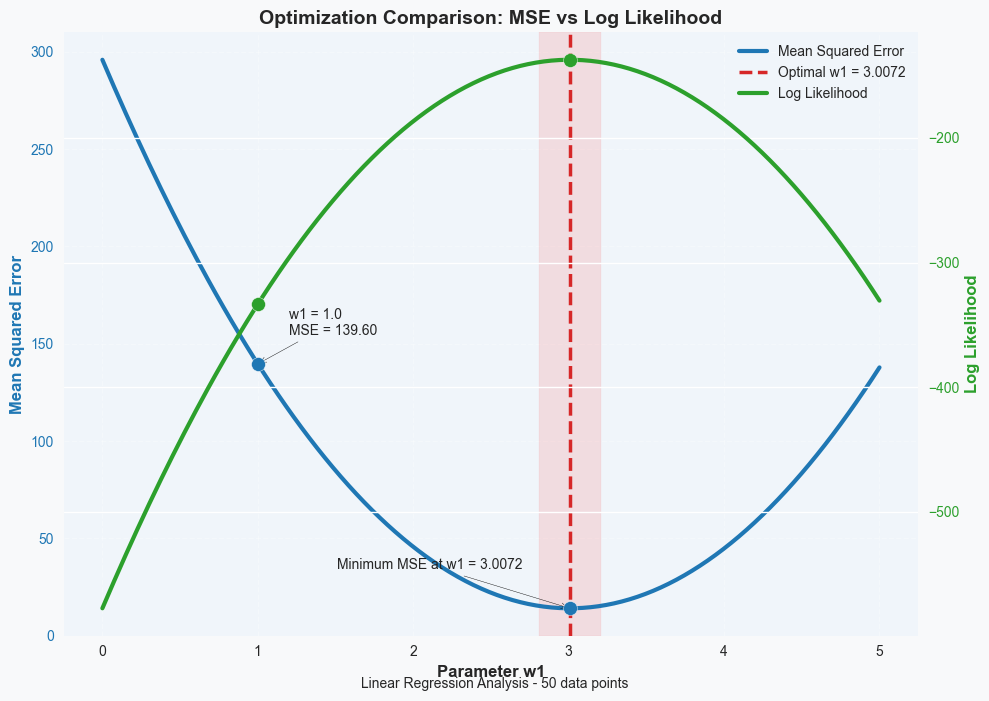

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Set a clean style
plt.style.use('seaborn-v0_8')

# Load the data
data_np = np.loadtxt('data.csv', delimiter=',')
x_np = data_np[:, 0]
y_np = data_np[:, 1]

# MSE function
def mse(w1):
    y_pred = 2 + w1 * x_np
    return np.mean((y_np - y_pred)**2)

# Log likelihood function
def log_likelihood(w1):
    sigma = 4
    n = len(x_np)
    y_pred = 2 + w1 * x_np
    errors = y_np - y_pred
    
    term1 = - (n / 2.0) * np.log(2 * np.pi * sigma**2)
    term2 = - (1.0 / (2.0 * sigma**2)) * np.sum(errors**2)
    
    return term1 + term2

# Optimal w1 value
optimal_w1_mse = 3.0072265625

# Create a range of w1 values
w1_values = np.linspace(0, 5, 200)  # More points for smoother curves

# Calculate MSE and log likelihood for each w1
mse_values = [mse(w1) for w1 in w1_values]
log_likelihood_values = [log_likelihood(w1) for w1 in w1_values]

# Create the figure with a nice background
fig, ax1 = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#f8f9fa')
ax1.set_facecolor('#f0f5fa')

# Create a second y-axis for log likelihood
ax2 = ax1.twinx()

# Plot MSE with a distinctive blue color
ax1.plot(w1_values, mse_values, color='#1f77b4', linewidth=3, label='Mean Squared Error')

# Plot Log Likelihood with a distinctive green color
ax2.plot(w1_values, log_likelihood_values, color='#2ca02c', linewidth=3, label='Log Likelihood')

# Add vertical line at optimal w1
ax1.axvline(x=optimal_w1_mse, color='#d62728', linestyle='--', linewidth=2.5, 
           label=f'Optimal w1 = {optimal_w1_mse:.4f}')

# Add markers at key points
ax1.scatter([1.0, optimal_w1_mse], [mse(1.0), mse(optimal_w1_mse)], 
           color='#1f77b4', s=100, zorder=5, marker='o', edgecolor='white')
ax2.scatter([1.0, optimal_w1_mse], [log_likelihood(1.0), log_likelihood(optimal_w1_mse)], 
           color='#2ca02c', s=100, zorder=5, marker='o', edgecolor='white')

# Add annotations for key points
ax1.annotate(f'w1 = 1.0\nMSE = {mse(1.0):.2f}', 
            xy=(1.0, mse(1.0)), xytext=(1.2, mse(1.0) + 15),
            arrowprops=dict(arrowstyle='->'), fontsize=10)

ax1.annotate(f'Minimum MSE at w1 = {optimal_w1_mse:.4f}', 
            xy=(optimal_w1_mse, mse(optimal_w1_mse)), 
            xytext=(optimal_w1_mse - 1.5, mse(optimal_w1_mse) + 20),
            arrowprops=dict(arrowstyle='->'), fontsize=10)

# Add light shading around optimal value
ax1.axvspan(optimal_w1_mse - 0.2, optimal_w1_mse + 0.2, alpha=0.1, color='red')

# Set labels with custom font sizes
ax1.set_xlabel('Parameter w1', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold', color='#1f77b4')
ax2.set_ylabel('Log Likelihood', fontsize=12, fontweight='bold', color='#2ca02c')
ax1.set_title('Optimization Comparison: MSE vs Log Likelihood', fontsize=14, fontweight='bold')

# Customize ticks for readability
ax1.tick_params(axis='y', colors='#1f77b4')
ax2.tick_params(axis='y', colors='#2ca02c')

# Add a grid for better readability
ax1.grid(True, linestyle='--', alpha=0.3)

# Add legend with custom placement
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', framealpha=0.9)

# Add a note about the data
plt.figtext(0.5, 0.01, 'Linear Regression Analysis - 50 data points', 
           ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('mse_log_likelihood_plot.png', dpi=300)
plt.show()

Problem 2